# Superstore EDA Using Pandas & Matplotlib

#### Importing relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Extraction

#### Importing .csv dataset into Pandas dataframe

In [2]:
sales_data = pd.read_csv(r'C:\Users\vaish\OneDrive\Desktop\SQL Project\Superstore project\train.csv')

#### Previewing dataframe

In [3]:
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### Checking total rows & columns in the dataframe

In [4]:
sales_data.shape

(9800, 18)

#### Listing the columns & their datatypes

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Statistical summary of the numeric fields in the dataframe

In [6]:
sales_data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data Transformation

#### Checking for duplicate rows in the dataframe

In [7]:
sales_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

#### Checking for Null values in dataframe

In [8]:
sales_data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

#### Replacing Null values in 'Postal Code' with 0

In [9]:
sales_data['Postal Code'].fillna(0, inplace = True)

C:\Users\vaish\AppData\Local\Temp\ipykernel_22748\2675327723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Postal Code'].fillna(0, inplace = True)


#### Re-checking for Null values

In [10]:
sales_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#### Formatting Date fields from String to DateTime datatype

In [11]:
date_cols = ['Order Date','Ship Date']
for col in date_cols:
    sales_data[col] = pd.to_datetime(sales_data[col], format='mixed')

#### Re-checking datatypes of fields

sales_data.info()

## EDA

#### Total Revenue generated by Store

In [12]:
total_sales = sales_data['Sales'].sum().round(2)
print(total_sales)

2261536.78


#### Average Order Value of Products Sold

In [13]:
avg_order_value = sales_data['Sales'].mean().round(2)
print(avg_order_value)

230.77


#### Unique Products Sold by the Store

In [14]:
total_unique_products = sales_data['Product ID'].nunique()
total_unique_products

1861

#### Unique Customers ordering from the Store

In [15]:
total_customers = sales_data['Customer ID'].nunique()
total_customers

793

#### Total Revenue generated by each Category of Products

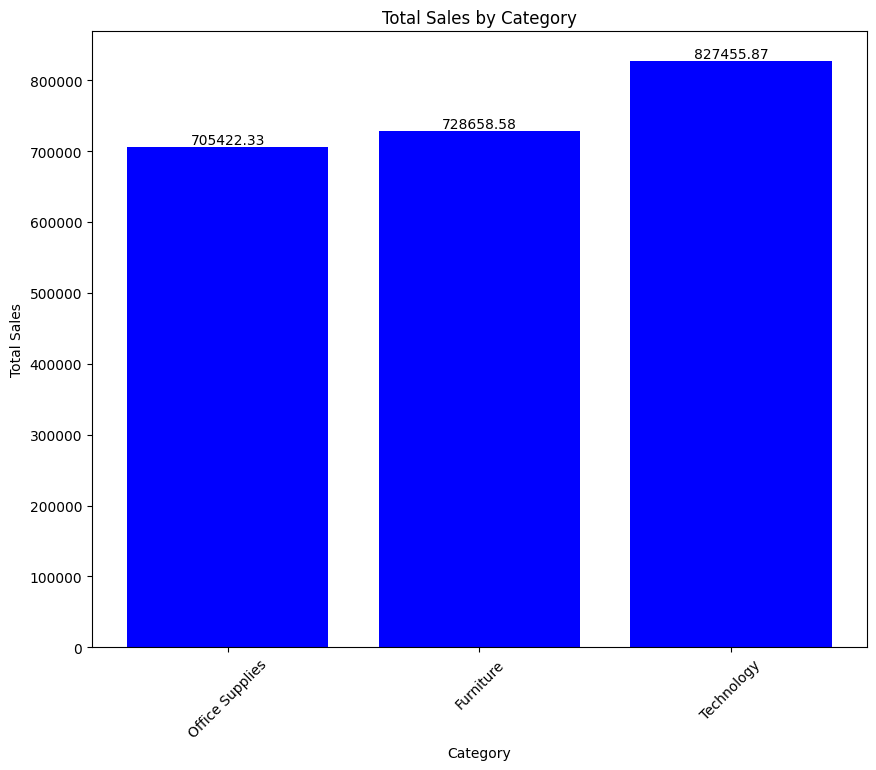

In [16]:
sales_per_category = sales_data.groupby('Category')['Sales'].sum().round(2).reset_index().sort_values(by='Sales').rename(columns={'Sales':'Total Sales'})
sales_per_category

plt.figure(figsize=(10,8))
bars = plt.bar(sales_per_category['Category'], sales_per_category['Total Sales'], color='blue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')
plt.savefig('rev_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

#### Total Revenue generated by each Sub-Category of Products

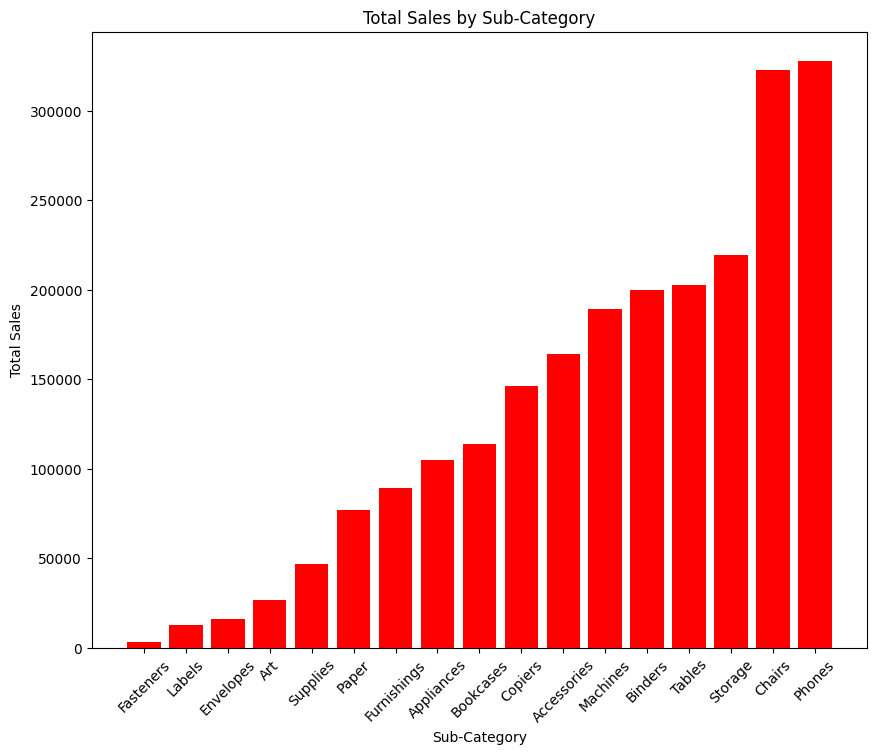

In [17]:
sales_per_subCategory = sales_data.groupby('Sub-Category')['Sales'].sum().round(2).reset_index().sort_values(by='Sales').rename(columns={'Sales':'Total Sales'})
sales_per_subCategory

plt.figure(figsize=(10,8))
bars = plt.bar(sales_per_subCategory['Sub-Category'], sales_per_subCategory['Total Sales'], color='red')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('rev_by_sub_category.png', dpi=300, bbox_inches='tight')
plt.show()

#### Distribution of Total Revenue over different Regions

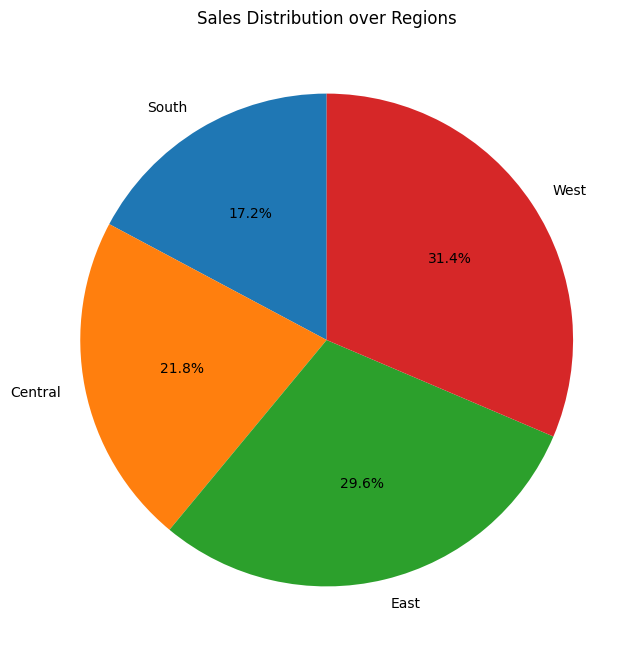

In [18]:
sales_per_region = sales_data.groupby('Region')['Sales'].sum().round(2).reset_index().sort_values(by='Sales').rename(columns={'Sales':'Total Sales'})
sales_per_region

plt.figure(figsize=(10,8))
sales_per_region['Total Sales'].plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=sales_per_region['Region'])
plt.ylabel('')
plt.title('Sales Distribution over Regions')
plt.savefig('regional_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

#### Top 10 States in the country with Highest Sales

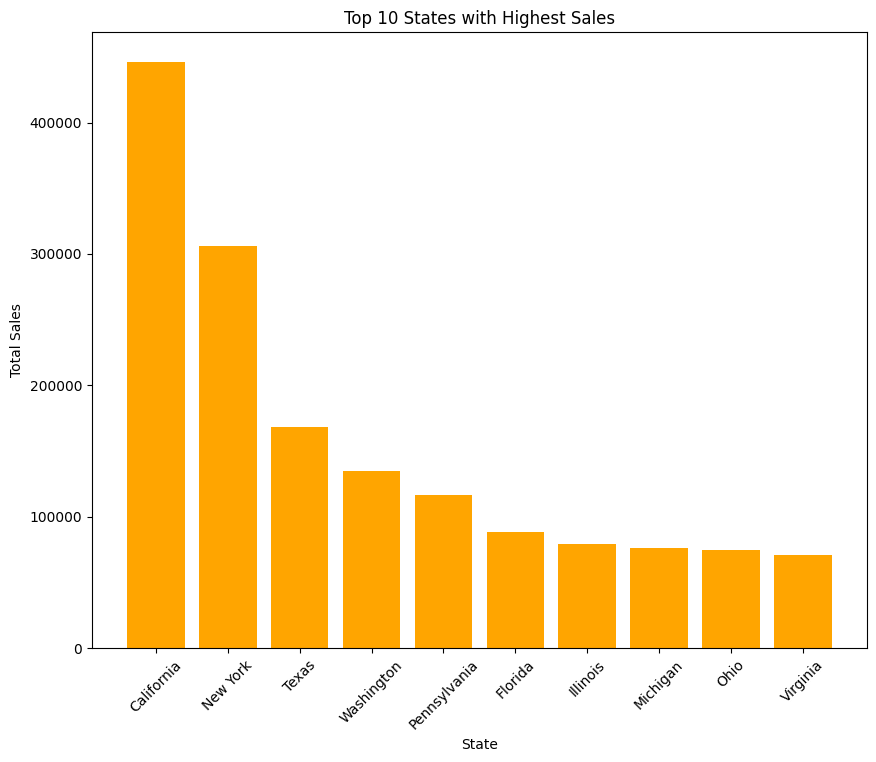

In [19]:
sales_by_state = sales_data.groupby('State')['Sales'].sum().round(2).sort_values(ascending=False).reset_index().rename(columns={'Sales':'Total Sales'})
sales_by_state

plt.figure(figsize=(10,8))
bars = plt.bar(sales_by_state['State'][0:10], sales_by_state['Total Sales'][0:10], color='orange')
plt.title('Top 10 States with Highest Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('top_10_states_by_rev.png', dpi=300, bbox_inches='tight')
plt.show()

### Trend of Total Revenue generated by Store over the years

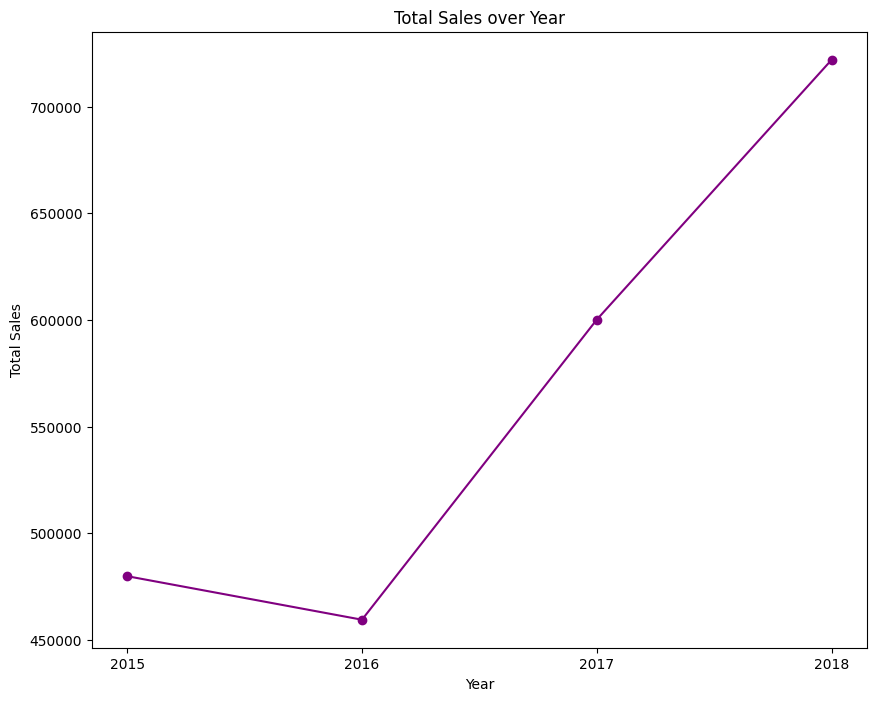

In [20]:
sales_per_year = sales_data.groupby(sales_data['Order Date'].dt.year)['Sales'].sum().round(2).reset_index().rename(columns={'Order Date':'Year','Sales':'Total Sales'})
sales_per_year

plt.figure(figsize=(10,8))
barss = plt.plot(sales_per_year['Year'], sales_per_year['Total Sales'], color='purple', marker='o')
plt.title('Total Sales over Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_per_year['Year'].astype(int))
plt.savefig('rev_trend_yearly.png', dpi=300, bbox_inches='tight')
plt.show()

#### Top 10 Customers based on Total Revenue generated to Store

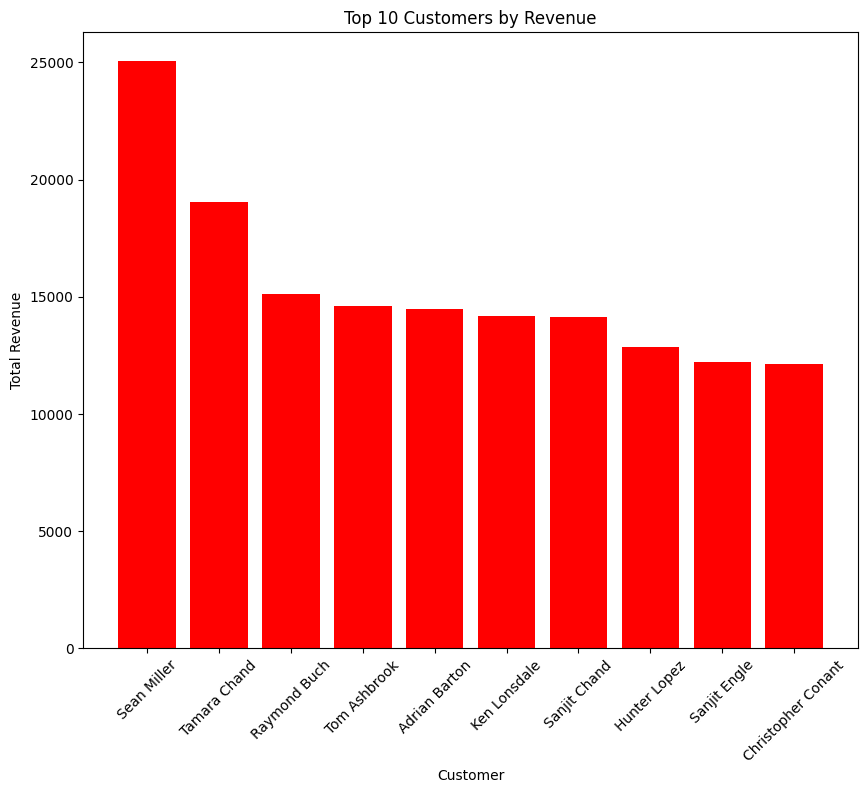

In [21]:
cust_sales = sales_data.groupby('Customer Name').agg( Total_Sales = ('Sales', 'sum'), No_of_Sales = ('Customer Name','count')).sort_values(by='Total_Sales', ascending=False).reset_index()
cust_sales[0:10]

plt.figure(figsize=(10,8))
bars = plt.bar(cust_sales['Customer Name'][0:10], cust_sales['Total_Sales'][0:10], color = 'red')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.savefig('top_10_custs_by_rev.png', dpi=300, bbox_inches='tight')
plt.show()

#### Top 10 Returning Customers

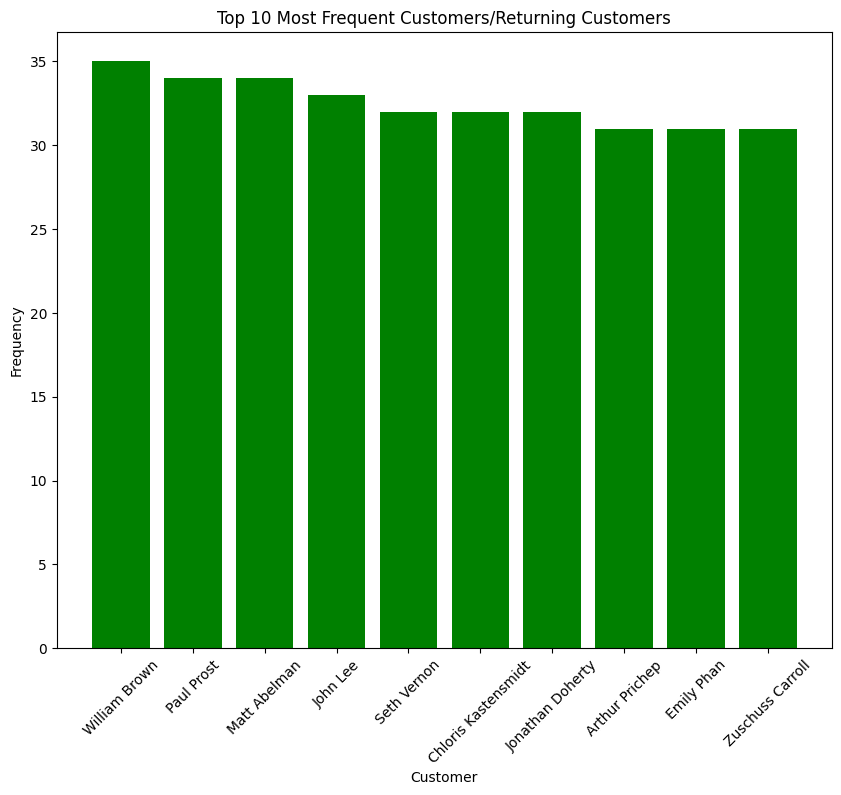

In [22]:
cust_sales = sales_data.groupby('Customer Name').agg( Total_Sales = ('Sales', 'sum'), No_of_Sales = ('Customer Name','count')).sort_values(by='No_of_Sales', ascending=False).reset_index()
cust_sales[0:10]

plt.figure(figsize=(10,8))
bars = plt.bar(cust_sales['Customer Name'][0:10], cust_sales['No_of_Sales'][0:10], color = 'green')
plt.title('Top 10 Most Frequent Customers/Returning Customers')
plt.xlabel('Customer')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.savefig('top_10_return_custs.png', dpi=300, bbox_inches='tight')
plt.show()

#### Total Revenue generated by each Shipment mode

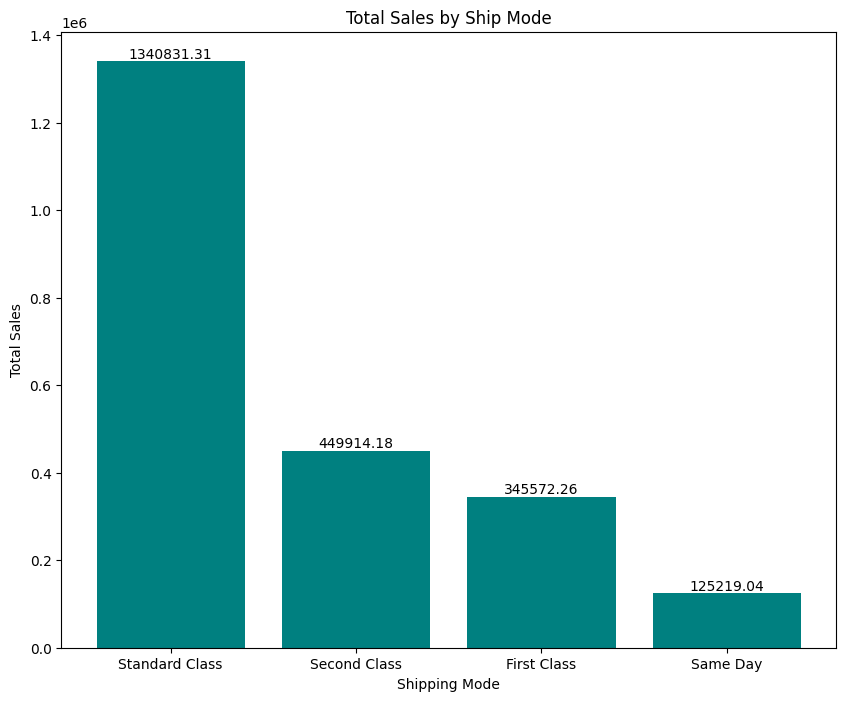

In [23]:
shipping_sales = sales_data.groupby('Ship Mode')['Sales'].sum().round(2).sort_values(ascending=False).reset_index().rename(columns={'Sales':'Total Sales'})
shipping_sales

plt.figure(figsize=(10,8))
bars = plt.bar(shipping_sales['Ship Mode'], shipping_sales['Total Sales'], color='teal')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')
plt.savefig('rev_by_ship_mode.png', dpi=300, bbox_inches='tight')
plt.show()

#### Top 10 products that generated Highest Revenue for the store

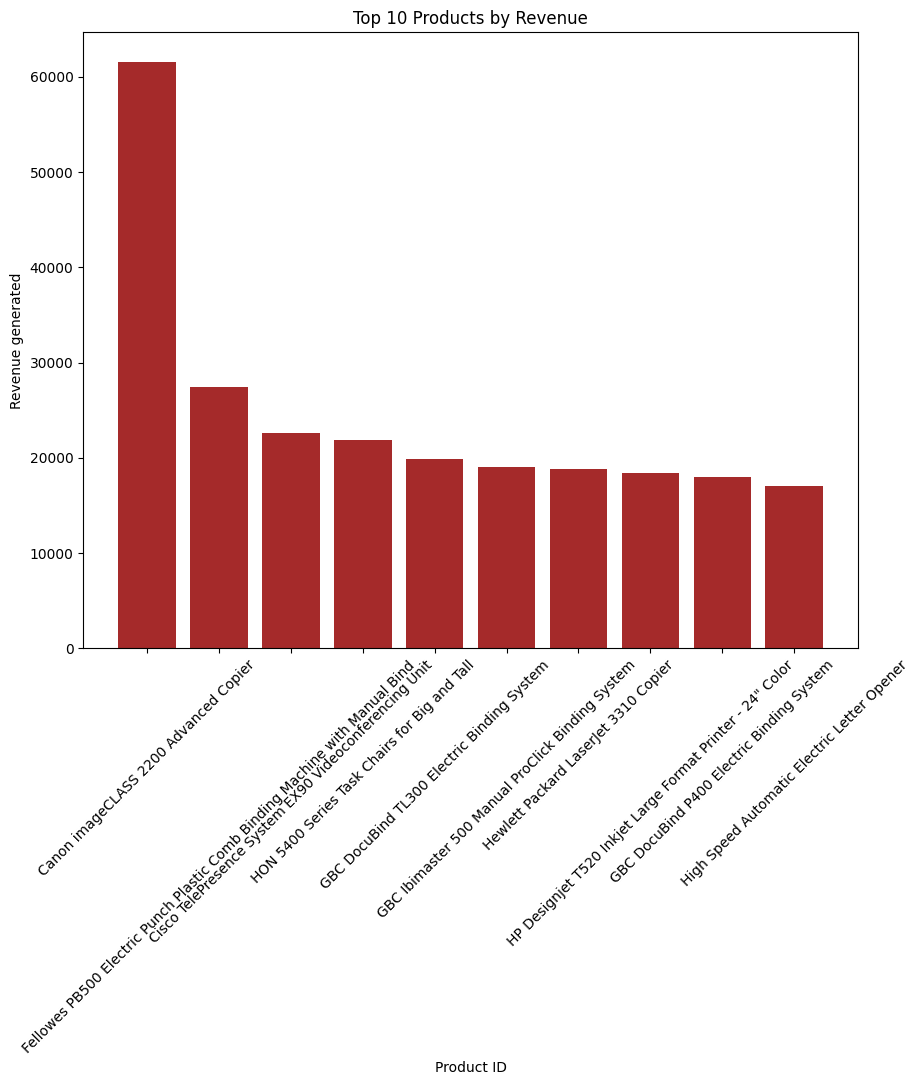

In [24]:
top_pdts = sales_data.groupby('Product Name')['Sales'].sum().round(2).sort_values(ascending=False).reset_index().rename(columns={'Sales':'Total Sales'})
top_pdts[0:10]

plt.figure(figsize=(10,8))
bars = plt.bar(top_pdts['Product Name'][0:10], top_pdts['Total Sales'][0:10], color='brown')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Revenue generated')
plt.xticks(rotation=45)
plt.savefig('top_10_high_rev_pdts.png', dpi=300, bbox_inches='tight')
plt.show()

#### Top 10 products that are Most Frequently ordered by Customers

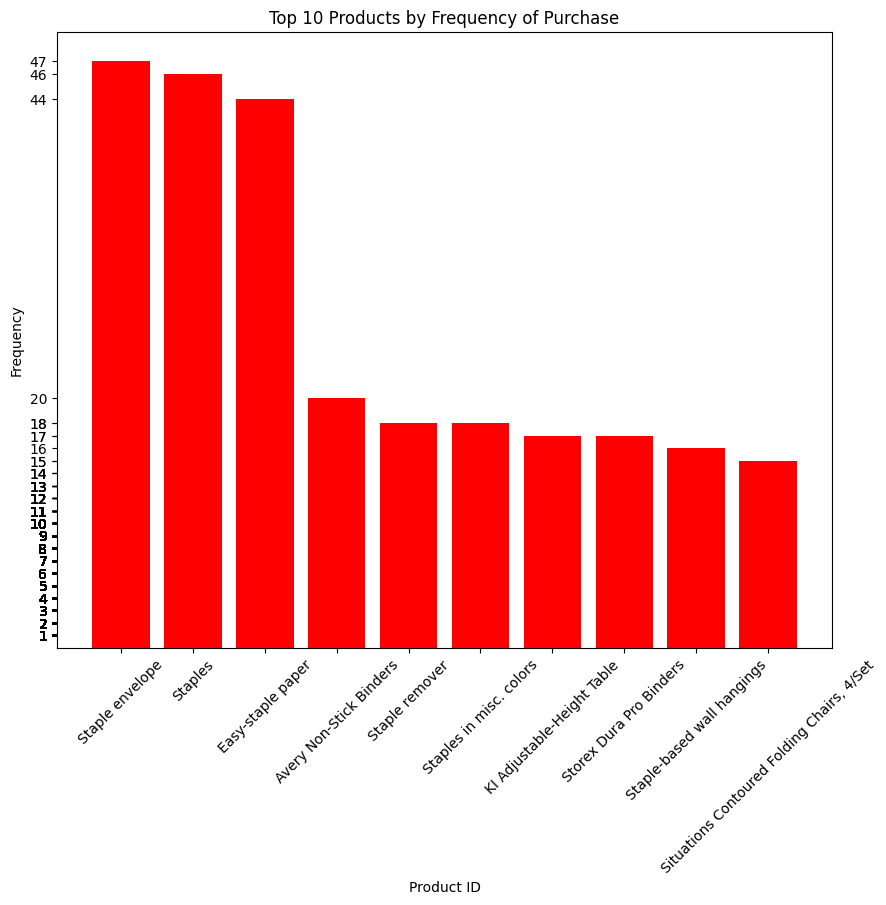

In [25]:
top_pdts = sales_data.groupby('Product Name').size().sort_values(ascending=False).reset_index(name='Frequency')
top_pdts[0:10]

plt.figure(figsize=(10,8))
bars = plt.bar(top_pdts['Product Name'][0:10], top_pdts['Frequency'][0:10],  color='red')
plt.title('Top 10 Products by Frequency of Purchase')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45 )
plt.yticks(top_pdts['Frequency'].astype(int))
plt.savefig('top_10_frq_pdts.png', dpi=300, bbox_inches='tight')
plt.show()